<a href="https://colab.research.google.com/github/yangyang1598/Deeplearning/blob/main/6_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터
---

## 1. 데이터 불러오기

In [ ]:
from tensorflow.keras import datasets
import numpy as np

fashion_mnist =datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train.shape, y_train.shape,x_test.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 2. 데이터 시각화 (EDA)

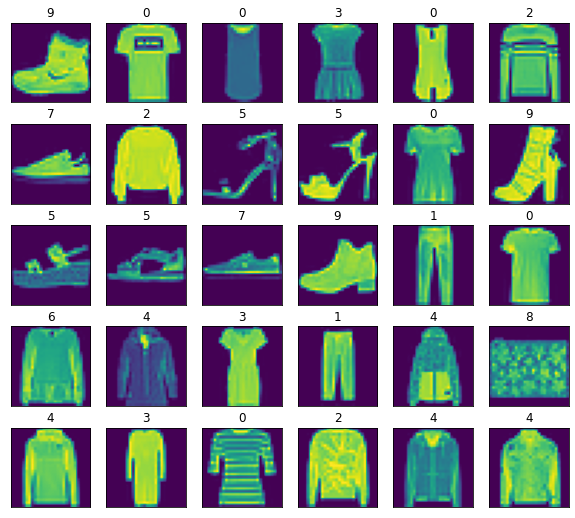

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
for i in range(30):
  plt.subplot(5,6,i+1)
  img=x_train[i]
  label=y_train[i]
  plt.title(label)
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
plt.show()

* 이미지 확인

* 실제 데이터 확인

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

* 데이터 시각화

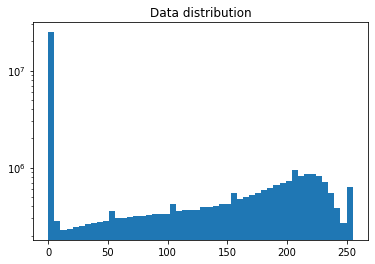

In [ ]:
plt.title('Data distribution')
plt.hist(np.reshape(x_train,(60000*28*28)),log=True,bins=50)
plt.show()

## 3. 데이터 전처리
  * 정규화
  * 원핫벡터


### **min max normalization**

# <center>$\frac{x-x_{min}}{x_{max}-x_{min}}$</center>

In [ ]:
def minmax(x):
  x_min=np.min(x)
  x_max=np.max(x)
  return (x-x_min)/(x_max-x_min)

In [ ]:
x_train_minmax=minmax(x_train)
x_test_minmax=minmax(x_test)
x_train_minmax.shape,x_test_minmax.shape

((60000, 28, 28), (10000, 28, 28))

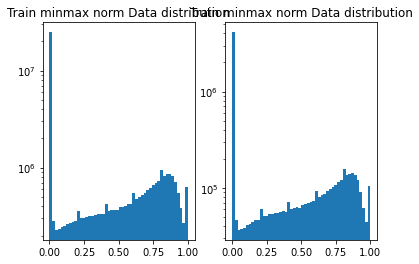

In [ ]:
plt.subplot(1,2,1)

plt.title('Train minmax norm Data distribution')
plt.hist(np.reshape(x_train_minmax,(60000*28*28)),log=True,bins=50)

plt.subplot(1,2,2)

plt.title('Train minmax norm Data distribution')
plt.hist(np.reshape(x_test_minmax,(10000*28*28)),log=True,bins=50)
plt.show()

### **Z-Score Normalization**


# <center>$\frac{x-\bar{x}}{\sigma}$</center>

In [ ]:
def z_score(x):
  x_mean=np.mean(x)
  x_std=np.std(x)
  return (x-x_mean)/x_std

In [ ]:
x_train_zscore=z_score(x_train)
x_test_zscore=z_score(x_test)
x_train_zscore.shape,x_test_zscore.shape

((60000, 28, 28), (10000, 28, 28))

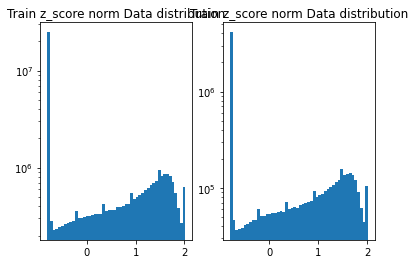

In [ ]:
plt.subplot(1,2,1)
plt.title('Train z_score norm Data distribution')
plt.hist(np.reshape(x_train_zscore,(60000*28*28)),log=True,bins=50)

plt.subplot(1,2,2)
plt.title('Train z_score norm Data distribution')
plt.hist(np.reshape(x_test_zscore,(10000*28*28)),log=True,bins=50)
plt.show()

### **one-hot coding**

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)
print (y_train_onehot)


[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 모델
---

## 1. 모델구현
---

In [ ]:
from tensorflow.keras import models,layers,optimizers

### **Softmax regression**

In [ ]:
sr= models.Sequential(name='Softmax_regression')
sr.add(layers.Flatten(input_shape=[28,28]))
sr.add(layers.Dense(10,activation='softmax'))
sr.summary()

Model: "Softmax_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### **DNN**

In [ ]:
dnn1=models.Sequential(name='DNN1')
#input
dnn1.add(layers.Flatten(input_shape=[28,28]))#차원을 바꾸어주는 함수 Flatten
#hidden
dnn1.add(layers.Dense(100,activation='relu'))
dnn1.add(layers.Dense(100,activation='relu'))
#output
dnn1.add(layers.Dense(10,activation='softmax'))

dnn1.summary()

Model: "DNN1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn2=models.Sequential(name='DNN2')
#input
dnn2.add(layers.Flatten(input_shape=[28,28]))#차원을 바꾸어주는 함수 Flatten
#hidden
dnn2.add(layers.Dense(150,activation='relu'))
dnn2.add(layers.Dense(150,activation='relu'))
#output
dnn2.add(layers.Dense(10,activation='softmax'))

dnn2.summary()

Model: "DNN2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


### **CNN**

In [ ]:
cnn1=models.Sequential(name="CNN1")
#x data:(28 28)->2차원
#dense : (764)->1차원
#convolution :(28,28,1)->3차원 


#input layers
cnn1.add(layers.Reshape([28,28,1],input_shape=[28,28]))
#hidden layers
cnn1.add(layers.Conv2D(10,5,activation='relu'))
cnn1.add(layers.MaxPool2D(pool_size=3))
cnn1.add(layers.Conv2D(10,5,activation='relu'))
cnn1.add(layers.MaxPool2D(pool_size=3))

#output layer
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(10,activation='softmax'))

cnn1.summary()

Model: "CNN1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 10)          2510      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110    

In [ ]:
cnn2=models.Sequential(name="CNN2")
#x data:(28 28)->2차원
#dense : (764)->1차원
#convolution :(28,28,1)->3차원 


#input layers
cnn2.add(layers.Reshape([28,28,1],input_shape=[28,28]))
#hidden layers
cnn2.add(layers.Conv2D(8,5,activation='relu'))
cnn2.add(layers.MaxPool2D(pool_size=3))
cnn2.add(layers.Conv2D(8,5,activation='relu'))
cnn2.add(layers.MaxPool2D(pool_size=3))

#output layer
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(10,activation='softmax'))

cnn2.summary()

Model: "CNN2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)           1608      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 8)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                90     

## 2. 학습
---

### **Softmax Regression**

In [ ]:
sr.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])

sr.fit(x_train_minmax,y_train_onehot,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4103 - acc: 0.8598
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4096 - acc: 0.8604
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4087 - acc: 0.8605
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4079 - acc: 0.8611
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4071 - acc: 0.8603
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4059 - acc: 0.8612
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4055 - acc: 0.8608
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4044 - acc: 0.8620
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4041 - acc: 0.8619
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4034 - acc: 0.8619
Epoch 11/20
1875/1875 [======

### **DNN**

In [ ]:
dnn1.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])

dnn1.fit(x_train_minmax,y_train_onehot,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2816 - acc: 0.8987
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2760 - acc: 0.8993
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - acc: 0.9006
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2697 - acc: 0.9021
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2648 - acc: 0.9047
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2621 - acc: 0.9056
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2576 - acc: 0.9067
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2553 - acc: 0.9072
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2520 - acc: 0.9089
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2478 - acc: 0.9103
Epoch 11/20
1875/1875 [======

In [ ]:
dnn2.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])

dnn2.fit(x_train_minmax,y_train_onehot,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - acc: 0.9022
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2685 - acc: 0.9032
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2647 - acc: 0.9038
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2608 - acc: 0.9060
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2571 - acc: 0.9070
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2528 - acc: 0.9076
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2493 - acc: 0.9099
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2456 - acc: 0.9116
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2422 - acc: 0.9119
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2384 - acc: 0.9143
Epoch 11/20
1875/1875 [======

### CNN

In [ ]:
cnn1.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])

cnn1.fit(x_train_minmax,y_train_onehot,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1373 - acc: 0.6015
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6857 - acc: 0.7493
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6371 - acc: 0.7665
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6084 - acc: 0.7774
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5860 - acc: 0.7863
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5665 - acc: 0.7939
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5499 - acc: 0.8001
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5355 - acc: 0.8066
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5223 - acc: 0.8114
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5114 - acc: 0.8152
Epoch 11/20
1875/1875 [======

In [ ]:
cnn2.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])

cnn2.fit(x_train_minmax,y_train_onehot,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3488 - acc: 0.5269
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7404 - acc: 0.7216
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6672 - acc: 0.7461
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6296 - acc: 0.7610
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6029 - acc: 0.7718
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5820 - acc: 0.7799
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5666 - acc: 0.7868
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5528 - acc: 0.7932
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5416 - acc: 0.7978
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5309 - acc: 0.8032
Epoch 11/20
1875/1875 [======

## 3. 성능평가
---

### Softmax Regression

In [ ]:
#testset을 평가

sr.evaluate(x_test_minmax,y_test_onehot)


313/313 [==============================] - 1s 3ms/step - loss: 0.4463 - acc: 0.8424


[0.4462709426879883, 0.8424000144004822]

### DNN

In [ ]:
dnn1.evaluate(x_test_minmax,y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.3383 - acc: 0.8815


[0.3382871448993683, 0.8815000057220459]

In [ ]:
dnn2.evaluate(x_test_minmax,y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.3429 - acc: 0.8834


[0.34293946623802185, 0.883400022983551]

### CNN

In [ ]:
cnn1.evaluate(x_test_minmax,y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.4972 - acc: 0.8184


[0.49720048904418945, 0.8184000253677368]

In [ ]:
cnn2.evaluate(x_test_minmax,y_test_onehot)

RuntimeError: ignored